In [33]:
import sys
print(sys.version)

3.7.0 (default, Jun 28 2018, 07:39:16) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [34]:
# import torch
import numpy as np
import pandas as pd

### Load features and labels

In [35]:
# data = np.load("openl3.npy") 
# data = np.load("openl3_48k.npy")
features = np.load("resnet.npy") # video
# data = np.load("yamnet.npy") # audio
# data = np.load("vgg.npy") # video
features.shape

(25403, 2048)

In [36]:
labels = pd.read_csv("all_labels.csv")
labels.head()

,Unnamed: 0,file_name,timestamp,car,truck,bicycle,motorbike,bus,total,night,snow,rain,has_annotation
0,0,street_traffic-barcelona-161-4901,0.5,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
1,1,street_traffic-barcelona-161-4901,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2,street_traffic-barcelona-161-4901,1.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,3,street_traffic-barcelona-161-4901,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,4,street_traffic-barcelona-161-4901,2.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [84]:
labels['location']=labels['file_name'].map(lambda x:x[15:-9])

In [87]:
labels.head()

,Unnamed: 0,file_name,timestamp,car,truck,bicycle,motorbike,bus,total,night,snow,rain,has_annotation,location
0,0,street_traffic-barcelona-161-4901,0.5,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,barcelona
1,1,street_traffic-barcelona-161-4901,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,barcelona
2,2,street_traffic-barcelona-161-4901,1.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,barcelona
3,3,street_traffic-barcelona-161-4901,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,barcelona
4,4,street_traffic-barcelona-161-4901,2.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,barcelona


In [88]:
labels.shape

(25403, 14)

<AxesSubplot:ylabel='Frequency'>

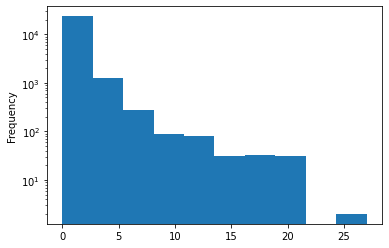

In [89]:
labels.car.plot.hist(log=True)

In [39]:
import plotly.express as px

In [101]:
df = labels[labels["has_annotation"] == 1]
for item in ['car', 'truck', 'bicycle',
       'motorbike', 'bus', 'total']:
       plot = df[item].value_counts().rename_axis('unique_values').reset_index(name='counts')
       fig = px.histogram(plot, x="unique_values", y="counts")
       fig.update_layout(width=400, title=item)

       fig.show()


In [47]:
df["total"].value_counts().rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,0.0,1531
1,1.0,1519
2,2.0,1102
3,3.0,719
4,4.0,411
5,5.0,262
6,6.0,180
7,7.0,146
8,8.0,114
9,9.0,88


### Remove all the data that we have not annotated

In [40]:
filtered_features = []
filtered_labels = []

In [41]:
labels[labels["has_annotation"] == 1].shape

(6346, 13)

In [42]:
for idx, row in labels.iterrows():
    if row["has_annotation"] == 1:
        filtered_features.append(features[idx])
        filtered_labels.append(row)
filtered_labels = pd.DataFrame(filtered_labels).reset_index()
filtered_features = np.array(filtered_features)


In [46]:
filtered_labels

,index,Unnamed: 0,file_name,timestamp,car,truck,bicycle,motorbike,bus,total,night,snow,rain,has_annotation
0,0,0,street_traffic-barcelona-161-4901,0.5,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
1,1,1,street_traffic-barcelona-161-4901,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2,2,street_traffic-barcelona-161-4901,1.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,3,3,street_traffic-barcelona-161-4901,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,4,4,street_traffic-barcelona-161-4901,2.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,14340,14340,street_traffic-milan-1094-42024,7.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6342,14341,14341,street_traffic-milan-1094-42024,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6343,14342,14342,street_traffic-milan-1094-42024,8.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6344,14343,14343,street_traffic-milan-1094-42024,9.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [92]:
filtered_features

array([[0.5086568 , 0.37365058, 0.14553727, ..., 1.6820776 , 0.0526443 ,
        0.39394346],
       [0.563622  , 0.3422173 , 0.08466097, ..., 1.5500202 , 0.07187937,
        0.33804762],
       [0.59320736, 0.33182016, 0.11260317, ..., 1.9472837 , 0.04356877,
        0.31022847],
       ...,
       [0.03873047, 0.24617459, 0.08687427, ..., 0.35887676, 0.03522294,
        0.07389224],
       [0.03640189, 0.2587227 , 0.10331469, ..., 0.3498185 , 0.04130539,
        0.08593201],
       [0.0333138 , 0.21030128, 0.10017405, ..., 0.33154953, 0.0508896 ,
        0.07264692]], dtype=float32)

In [43]:
filtered_features.shape

(6346, 2048)

In [44]:
filtered_labels.shape

(6346, 14)

In [26]:
df = filtered_labels[filtered_labels["has_annotation"] == 1]
for item in ['car', 'truck', 'bicycle',
       'motorbike', 'bus', 'total']:
       plot = df[item].value_counts().rename_axis('unique_values').reset_index(name='counts')
       fig = px.histogram(plot, x="unique_values", y="counts")
       fig.update_layout(width=1500, title=item)

       fig.show()

## Classify count of all kinds of cars

In [47]:
def get_count_label(num):
    if num == 0:
        return "free"
    if num < 3:
        return "few"
    if num < 6:
        return "medium"
    return "busy"

In [48]:
filtered_labels["total"].apply(get_count_label).value_counts()

few       2621
free      1531
medium    1392
busy       802
Name: total, dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
filtered_labels["total_encoder"] = labelencoder.fit_transform(filtered_labels["total"].apply(get_count_label))

enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(filtered_labels[["total_encoder"]]).toarray()

y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [53]:
labelencoder.classes_

array(['busy', 'few', 'free', 'medium'], dtype=object)

In [57]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
## code here
scaler = preprocessing.StandardScaler().fit(filtered_features)
dataS=scaler.transform(filtered_features)

pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

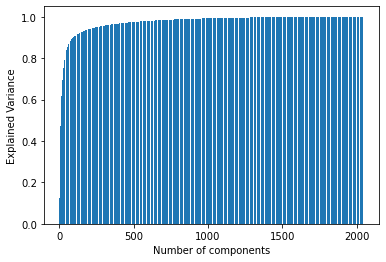

In [59]:
import matplotlib.pyplot as plt
#Plot explained variance per number of leading PC's 
n=2048
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [61]:
dataS.shape

(6346, 2048)

In [62]:
pca=PCA(n_components=128)
dataP=pca.fit_transform(dataS)

In [64]:
dataP.shape

(6346, 128)

In [54]:
from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(filtered_features, y, test_size=0.2, random_state=42)

In [65]:
# one hot encoding + PCA
X_train, X_valid, y_train, y_valid = train_test_split(dataP, filtered_labels["total_encoder"], test_size=0.2, random_state=42)

### Random Forest

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 400)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 40)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [70]:
random_forest_clf = RandomForestClassifier(random_state=42)

In [71]:
rf_random = RandomizedSearchCV(estimator = random_forest_clf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 12, 14, 16, 19, 21,
                                                      23, 26, 28, 30, 33, 35,
                                                      37, 40, 42, 44, 46, 49,
                                                      51, 53, 56, 58, 60, 63,
                                                      65, 67, 70, 72, 74, 76, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 204, 209, 213,
                                                         218, 222, 227, 231,
                                                         236, 240, 245, 249,
                                                         254, 258, 263, 267,
                                 

In [117]:
#generate a dataframe which contains all results
df_ytrain=pd.DataFrame(y_train)
df_ytrain=df_ytrain.reset_index()
train_predict=pd.DataFrame(rf_random.predict(X_train))
encoder_train=pd.merge(df_ytrain,train_predict,left_index=True, right_index=True).set_index('index')

df_yvalid=pd.DataFrame(y_valid).reset_index()
valid_predict=pd.DataFrame(rf_random.predict(X_valid))
encoder_valid=pd.merge(df_yvalid,valid_predict,left_index=True, right_index=True).set_index('index')

allpred_encoder=pd.concat([encoder_train,encoder_valid],axis=0)
new_col = ['total_encoder', 'pred_encoder']
allpred_encoder.columns = new_col
allpred_encoder=allpred_encoder.sort_index(ascending=True)
pred_flabels=pd.merge(filtered_labels,allpred_encoder['pred_encoder'],left_index=True, right_index=True)

pred_flabels['result'] = np.where(pred_flabels['total_encoder']==pred_flabels['pred_encoder'],'True','False')
pred_flabels

,index,Unnamed: 0,file_name,timestamp,car,truck,bicycle,motorbike,bus,total,night,snow,rain,has_annotation,total_encoder,pred_encoder,result
0,0,0,street_traffic-barcelona-161-4901,0.5,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1,1,True
1,1,1,street_traffic-barcelona-161-4901,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,1,True
2,2,2,street_traffic-barcelona-161-4901,1.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,1,True
3,3,3,street_traffic-barcelona-161-4901,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,1,True
4,4,4,street_traffic-barcelona-161-4901,2.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,14340,14340,street_traffic-milan-1094-42024,7.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,True
6342,14341,14341,street_traffic-milan-1094-42024,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,True
6343,14342,14342,street_traffic-milan-1094-42024,8.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,True
6344,14343,14343,street_traffic-milan-1094-42024,9.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,True


In [118]:
#calculate only valid data accuracy
pred_encoder=encoder_valid
new_col = ['total_encoder', 'pred_encoder']
pred_encoder.columns = new_col
pred_encoder['result'] = np.where(pred_encoder['total_encoder']==pred_encoder['pred_encoder'],'True','False')
pred_encoder

,total_encoder,pred_encoder,result
index,,,
730,0,1,False
5641,1,1,True
5635,1,1,True
4280,1,1,True
217,3,3,True
...,...,...,...
2187,1,1,True
2389,2,2,True
2893,1,1,True


<AxesSubplot:>

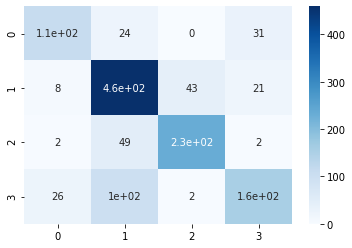

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_encoder['total_encoder'], pred_encoder['pred_encoder'])

##'busy', 'few', 'free', 'medium'
import seaborn as sn
df_cm = pd.DataFrame(cm) 
sn.heatmap(df_cm,cmap='Blues',annot=True)

In [120]:
#use same random state to get the valid results
valid_pred=pred_flabels.sample(n=1270,random_state=42)

#Day
dayt=valid_pred[(valid_pred['night']==0)&(valid_pred['result']=='True')].shape[0]/valid_pred[(valid_pred['night']==0)].shape[0]
#Night
dayf=valid_pred[(valid_pred['night']==1)&(valid_pred['result']=='True')].shape[0]/valid_pred[(valid_pred['night']==1)].shape[0]
#No Snow
snowf=valid_pred[(valid_pred['snow']==0)&(valid_pred['result']=='True')].shape[0]/valid_pred[(valid_pred['snow']==0)].shape[0]
#Snow
snowt=valid_pred[(valid_pred['snow']==1)&(valid_pred['result']=='True')].shape[0]/valid_pred[(valid_pred['snow']==1)].shape[0]
#No Rain
rainf=valid_pred[(valid_pred['rain']==0)&(valid_pred['result']=='True')].shape[0]/valid_pred[(valid_pred['rain']==0)].shape[0]
#Rain
raint=valid_pred[(valid_pred['rain']==1)&(valid_pred['result']=='True')].shape[0]/valid_pred[(valid_pred['rain']==1)].shape[0]

In [122]:
[dayt,raint,snowt], [dayf,rainf,snowf]

([0.7704741379310345, 0.3333333333333333, 0.8549618320610687],
 [0.7192982456140351, 0.7597145122918318, 0.7453906935908692])

In [121]:
import plotly.graph_objs as go
import plotly.offline as py
trace0 = go.Bar(
    x = ['Day','Rain','Snow'],
    y = [dayt,raint,snowt],
    name = 'True',
    marker=dict(
        color = 'rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x = ['Day','Rain','Snow'],
    y = [dayf,rainf,snowf],
    name = 'False',
    marker=dict(
        color = 'rgb(204,204,204)'
    )
)
data = [trace0,trace1]
py.iplot(data)

In [72]:
rf_random.best_params_

{'n_estimators': 1079,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 23}

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

def evaluate(model, test_features, test_labels, labels):
    print("accuracy:", model.score(test_features, test_labels))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    disp = plot_confusion_matrix(model, X_valid, y_valid,
                             display_labels=labelencoder.classes_,
                             cmap=plt.cm.Blues,
                             normalize="true", ax=ax1)

    print(disp.confusion_matrix)
    
    y_score = model.predict_proba(test_features)
    

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(labels)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels.apply(lambda x: 1 if x==i else 0),
                                                            y_score[:, i])
        average_precision[i] = average_precision_score(test_labels.apply(lambda x: 1 if x==i else 0),
                                                            y_score[:, i])
    
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue'])

    lines = []
    classes = []
    
    for i, color in zip(range(len(labels)), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        classes.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(labels[i], average_precision[i]))
        

    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Extension of Precision-Recall curve to multi-class')
    ax2.legend(lines, classes, loc=(0, -.38), prop=dict(size=14))
    
    plt.show()
    
    
    return model.score(test_features, test_labels)



accuracy: 0.6779527559055119
[[0.62275449 0.14371257 0.01796407 0.21556886]
 [0.0433145  0.7740113  0.10922787 0.07344633]
 [0.00696864 0.24390244 0.73519164 0.01393728]
 [0.12631579 0.37192982 0.02807018 0.47368421]]


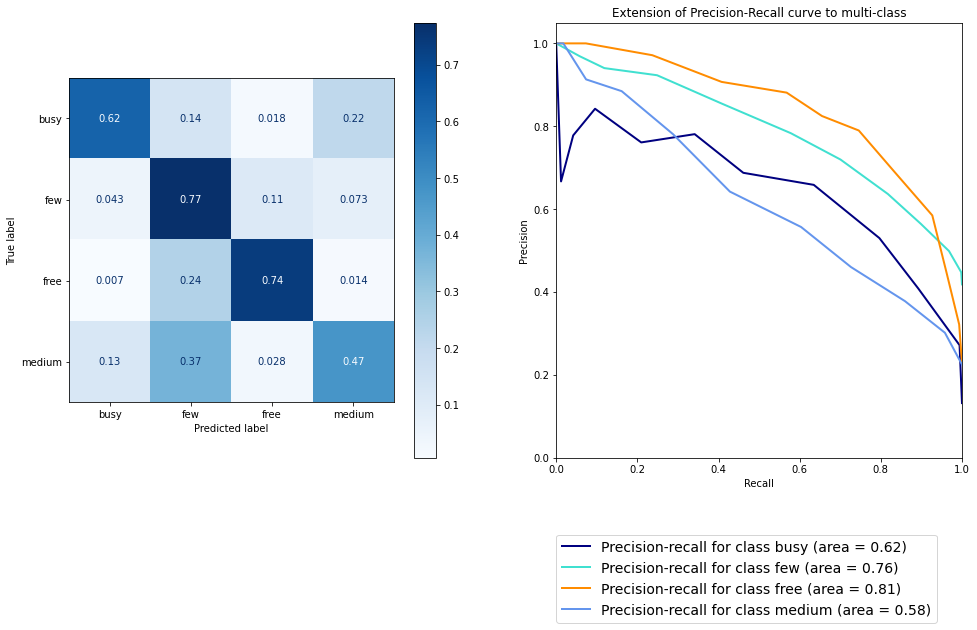

In [74]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_valid, y_valid, labelencoder.classes_)

In [81]:
X_valid.shape

(1270, 128)

In [ ]:
# 0:'busy', 1:'few', 2:'free', 3:'medium'
#Weighted F1

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, best_random.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       167
           1       0.73      0.86      0.79       531
           2       0.84      0.82      0.83       287
           3       0.74      0.55      0.63       285

    accuracy                           0.76      1270
   macro avg       0.77      0.72      0.74      1270
weighted avg       0.76      0.76      0.75      1270



accuracy: 0.7566929133858268
[[0.67065868 0.14371257 0.         0.18562874]
 [0.01506591 0.86440678 0.08097928 0.03954802]
 [0.00696864 0.17073171 0.81533101 0.00696864]
 [0.09122807 0.35438596 0.00701754 0.54736842]]


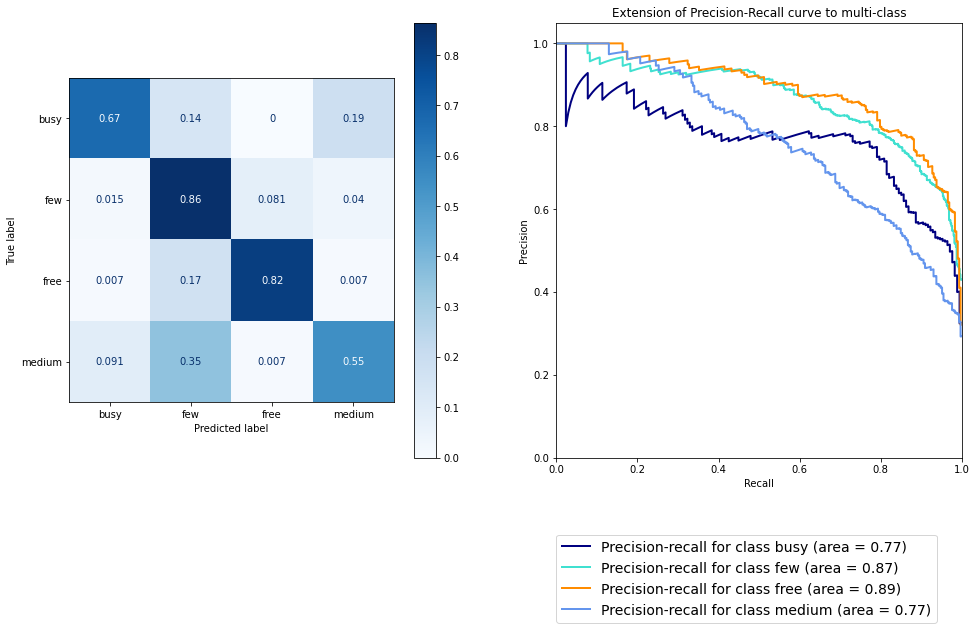

In [75]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_valid, y_valid, labelencoder.classes_)

### SVM

In [76]:
def evaluate_svm(model, test_features, test_labels, labels):
    print("accuracy:", model.score(test_features, test_labels))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    disp = plot_confusion_matrix(model, X_valid, y_valid,
                             display_labels=labelencoder.classes_,
                             cmap=plt.cm.Blues,
                             normalize="true", ax=ax1)

    print(disp.confusion_matrix)
    
    y_score = model.decision_function(test_features)
    

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(labels)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels.apply(lambda x: 1 if x==i else 0),
                                                            y_score[:, i])
        average_precision[i] = average_precision_score(test_labels.apply(lambda x: 1 if x==i else 0),
                                                            y_score[:, i])
    
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue'])

    lines = []
    classes = []
    
    for i, color in zip(range(len(labels)), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        classes.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(labels[i], average_precision[i]))
        

    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Extension of Precision-Recall curve to multi-class')
    ax2.legend(lines, classes, loc=(0, -.38), prop=dict(size=14))
    
    plt.show()

    return model.score(test_features, test_labels)

linear
accuracy: 0.6566929133858268
[[0.65868263 0.13772455 0.01197605 0.19161677]
 [0.0527307  0.70433145 0.1393597  0.10357815]
 [0.02439024 0.20557491 0.76655052 0.00348432]
 [0.14035088 0.3754386  0.02807018 0.45614035]]


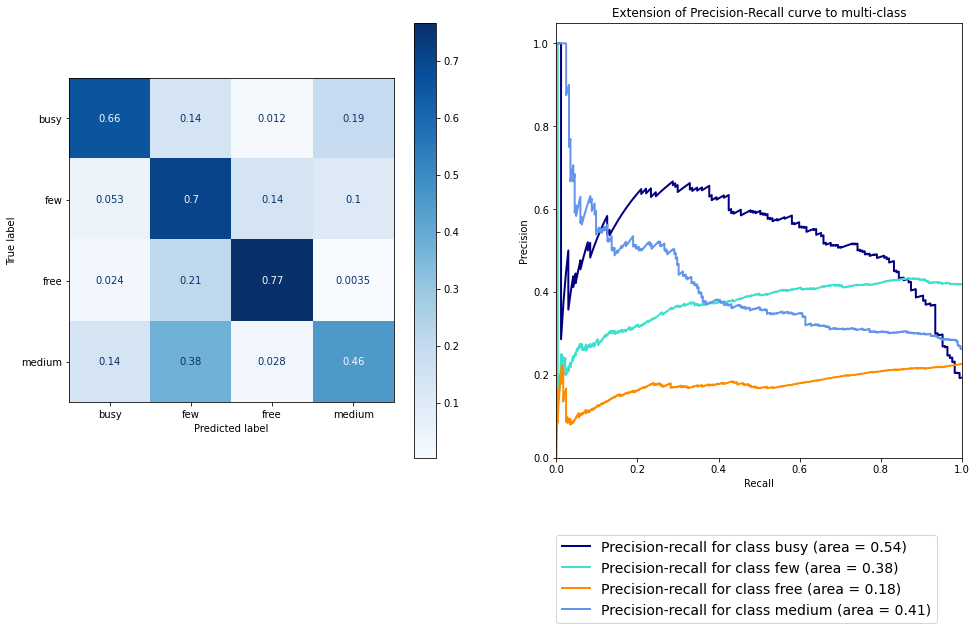

poly
accuracy: 0.6740157480314961
[[0.58682635 0.17964072 0.00598802 0.22754491]
 [0.03389831 0.78531073 0.11111111 0.06967985]
 [0.01393728 0.23344948 0.728223   0.02439024]
 [0.09824561 0.41403509 0.0245614  0.46315789]]


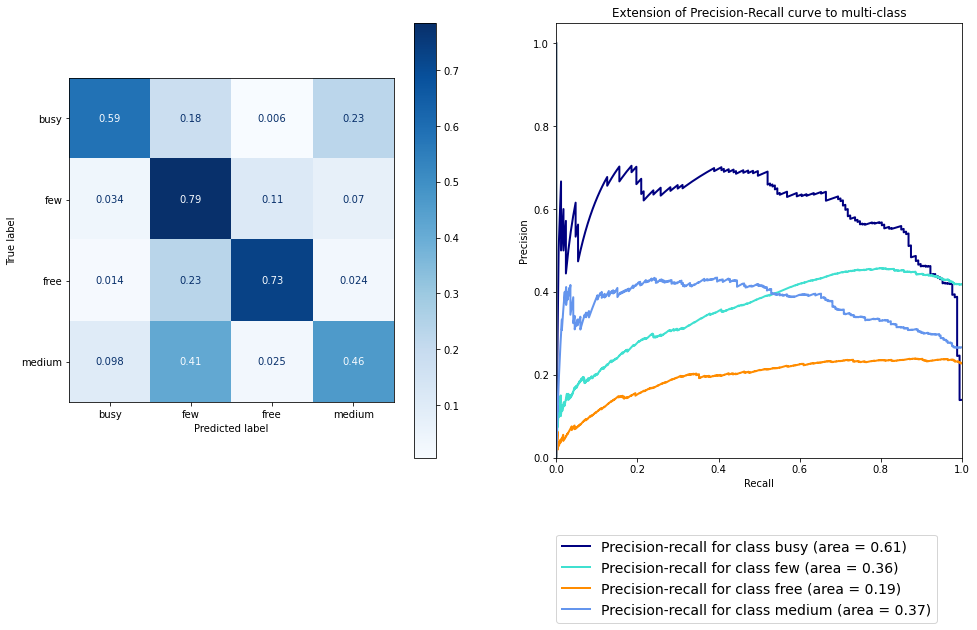

rbf
accuracy: 0.6464566929133858
[[0.51497006 0.22754491 0.01197605 0.24550898]
 [0.02824859 0.74764595 0.13747646 0.086629  ]
 [0.0174216  0.24041812 0.728223   0.01393728]
 [0.09824561 0.4245614  0.0245614  0.45263158]]


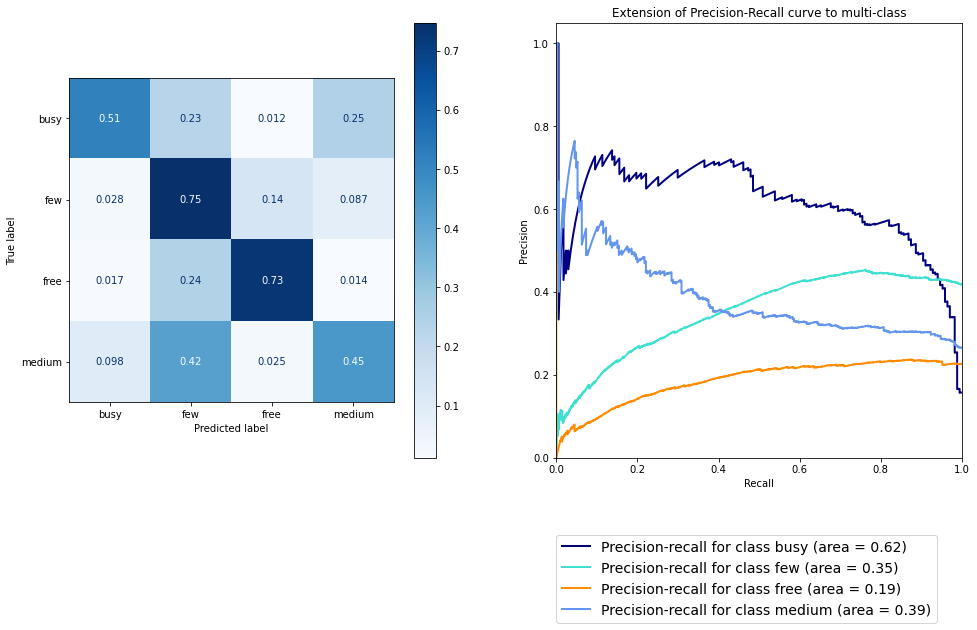

sigmoid
accuracy: 0.5275590551181102
[[0.43113772 0.25748503 0.05988024 0.25149701]
 [0.0527307  0.65913371 0.16572505 0.12241055]
 [0.03135889 0.36585366 0.58536585 0.0174216 ]
 [0.12631579 0.49473684 0.09824561 0.28070175]]


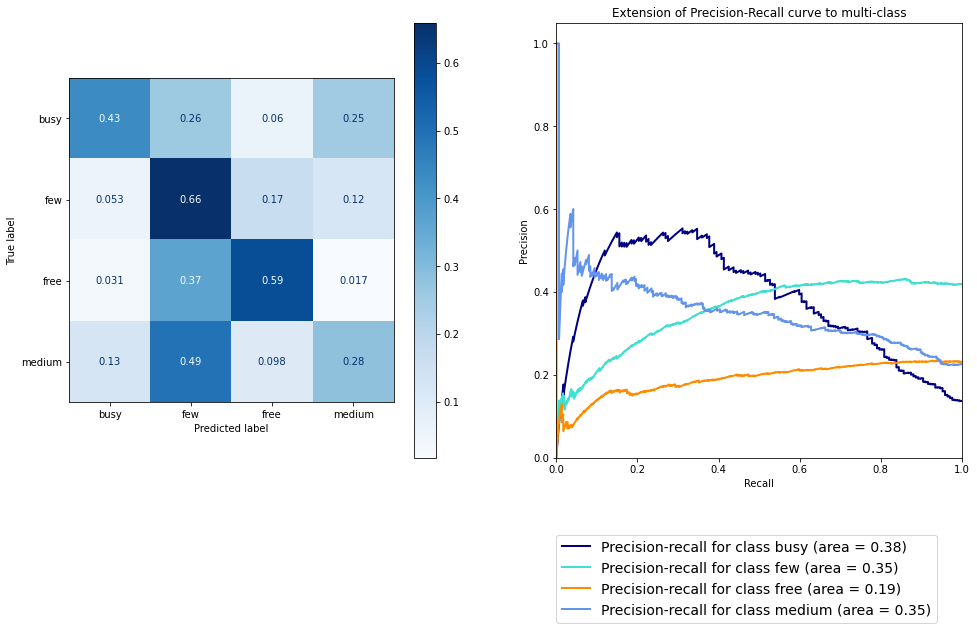

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    print(kernel)
    clf = SVC(kernel=kernel, decision_function_shape="ovo")
    clf.fit(X_train, y_train)
    random_accuracy = evaluate_svm(clf, X_valid, y_valid, labelencoder.classes_)

### LSTM

In [7]:
filtered_features = filtered_features.reshape(6346//19, 19, 2048)

In [8]:
video_labels = pd.read_csv("video_labels.csv")
video_labels = video_labels[video_labels["has_annotation"]==1]

In [13]:
labelencoder = LabelEncoder()
video_labels["count_label"] = labelencoder.fit_transform(video_labels["total"].apply(get_count_label))

In [14]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(video_labels["count_label"])

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(filtered_features, y, test_size=0.2, random_state=42)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [19]:
verbose, epochs, batch_size = 0, 50, 30
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
_, accuracy = model.evaluate(X_valid, y_valid, batch_size=batch_size, verbose=0)
print(accuracy)

0.5373134613037109


In [20]:
_, insample_accuracy = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
print(insample_accuracy)

0.7715355753898621
